# EDA

In [24]:
import os
import sys
sys.path.append(os.path.abspath('..'))

In [25]:
from importlib import reload
import scripts.data_load_clean_transform
reload(scripts.data_load_clean_transform)

<module 'scripts.data_load_clean_transform' from 'c:\\ML and DS Files\\Kifiya AI\\Kaim-week-6\\scripts\\data_load_clean_transform.py'>

In [26]:
from scripts.data_load_clean_transform import DataLoader, DataCleaner

In [27]:
# Load the Data
file_path = ('../week 6 data/data/data.csv')
load_data = DataLoader(file_path)
data = load_data.load_csv()

2025-01-24 20:42:39,642 - INFO - Data successfully loaded from ../week 6 data/data/data.csv
2025-01-24 20:42:39,644 - INFO - DataFrame Shape: (95662, 16)


In [28]:
data.head(2)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0


## 1. Overview of the Data:

In [29]:
# check missing values
cleaner = DataCleaner(data)
cleaner.check_missing_values()

2025-01-24 20:42:39,708 - INFO - Checking for missing values in the DataFrame.
2025-01-24 20:42:39,818 - INFO - Missing values check completed.


,Column,Missing Values,Missing Percentage,Data Type
0,TransactionId,0,0.0,object
1,BatchId,0,0.0,object
2,AccountId,0,0.0,object
3,SubscriptionId,0,0.0,object
4,CustomerId,0,0.0,object
5,CurrencyCode,0,0.0,object
6,CountryCode,0,0.0,int64
7,ProviderId,0,0.0,object
8,ProductId,0,0.0,object
9,ProductCategory,0,0.0,object


In [30]:
# Summary Statistics
cleaner.summary_statistics()

2025-01-24 20:42:39,870 - INFO - Calculating summary statistics.


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


2025-01-24 20:42:39,964 - INFO - Visualizing distribution of numerical features.
2025-01-24 20:42:39,972 - WARNING - Column CountryCode has constant values. Skipping visualization.


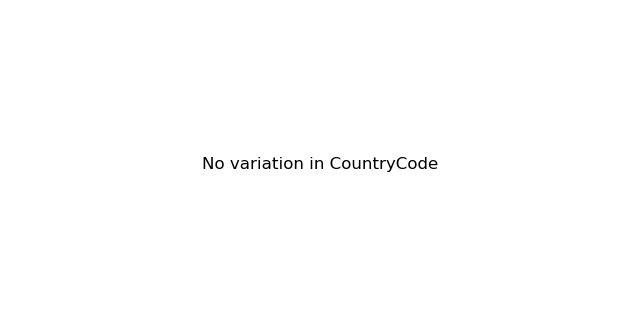

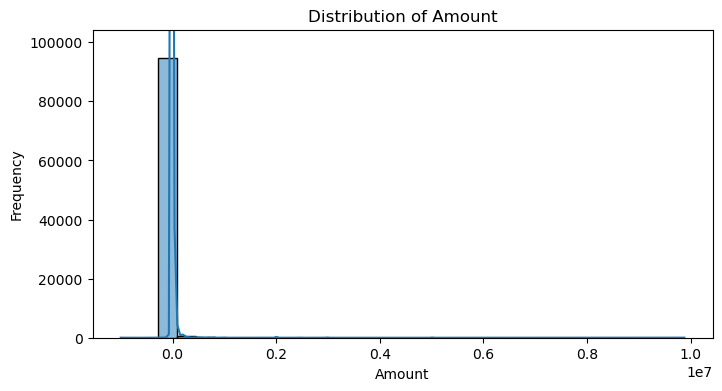

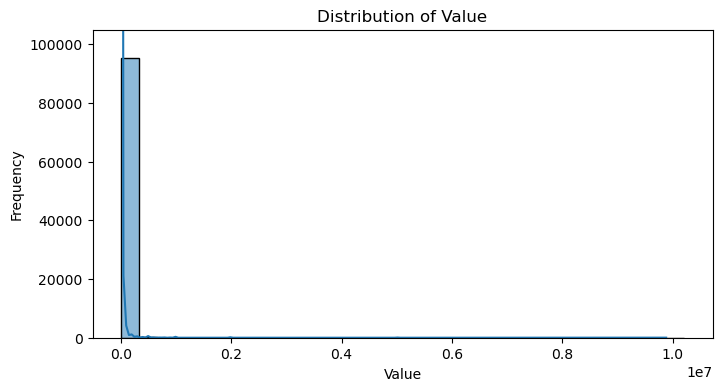

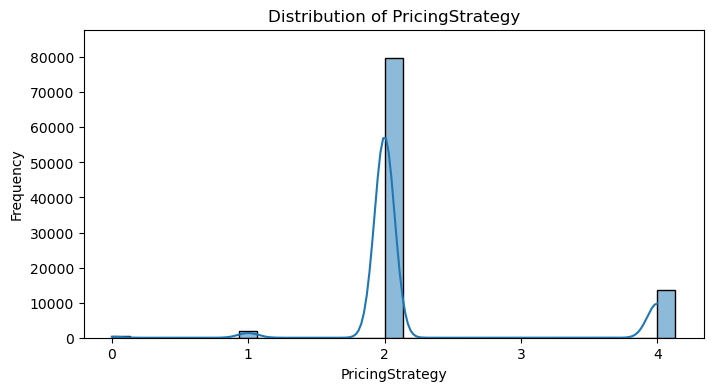

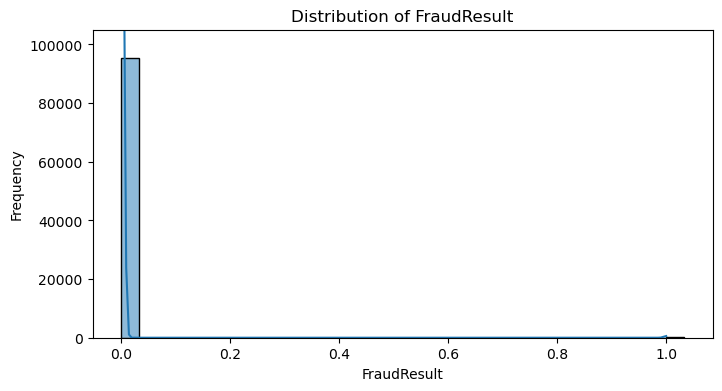

In [31]:
# Distribution of Numerical Features
cleaner.distribution_numerical_features()

In [32]:
category_col = ['CurrencyCode','ProviderId', 
                'ProductId', 'ProductCategory', 'ChannelId',]

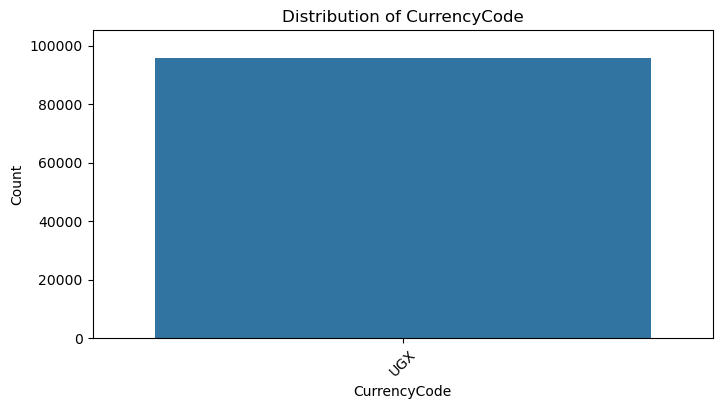

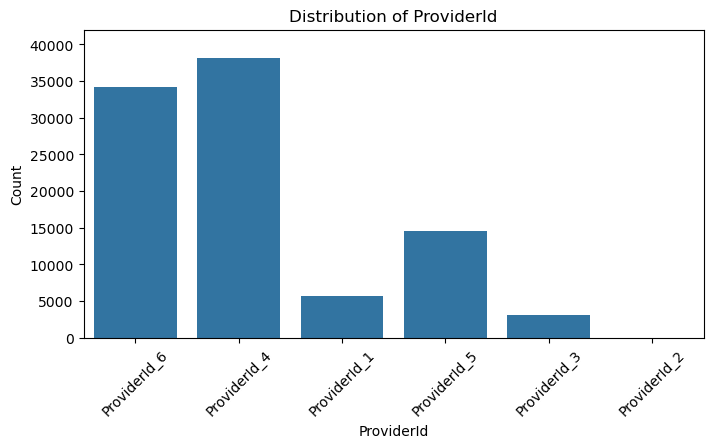

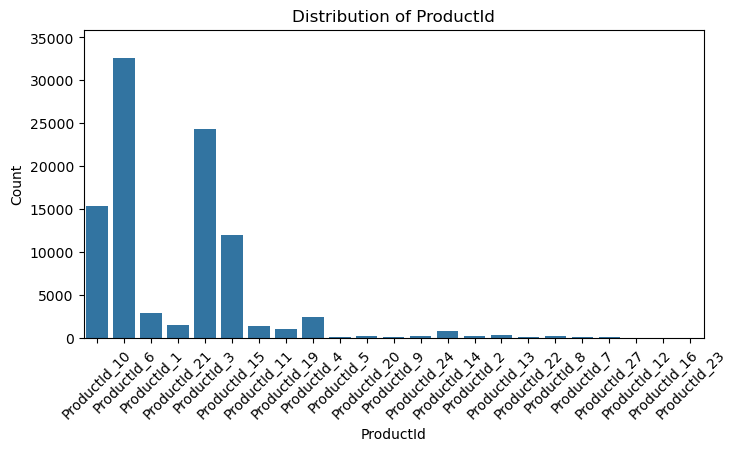

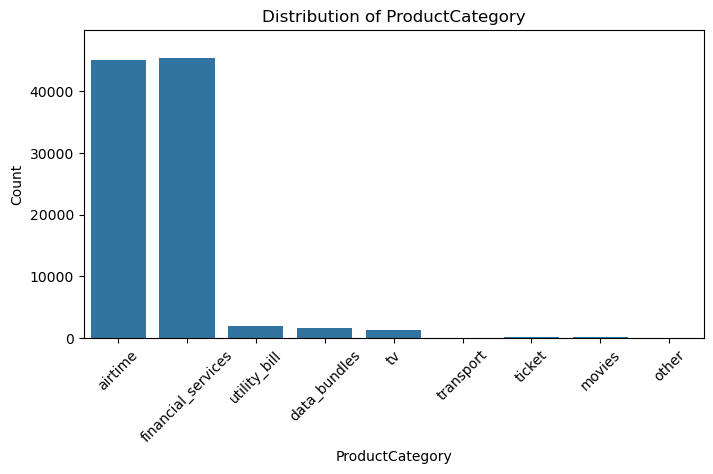

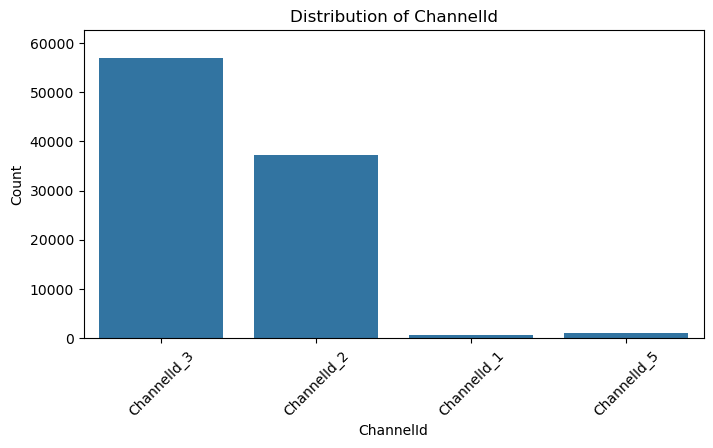

In [33]:
# Distribution of catagorical features
cleaner.visualize_categorical_distributions(columns=category_col)

2025-01-24 20:43:55,578 - INFO - Performing correlation analysis.


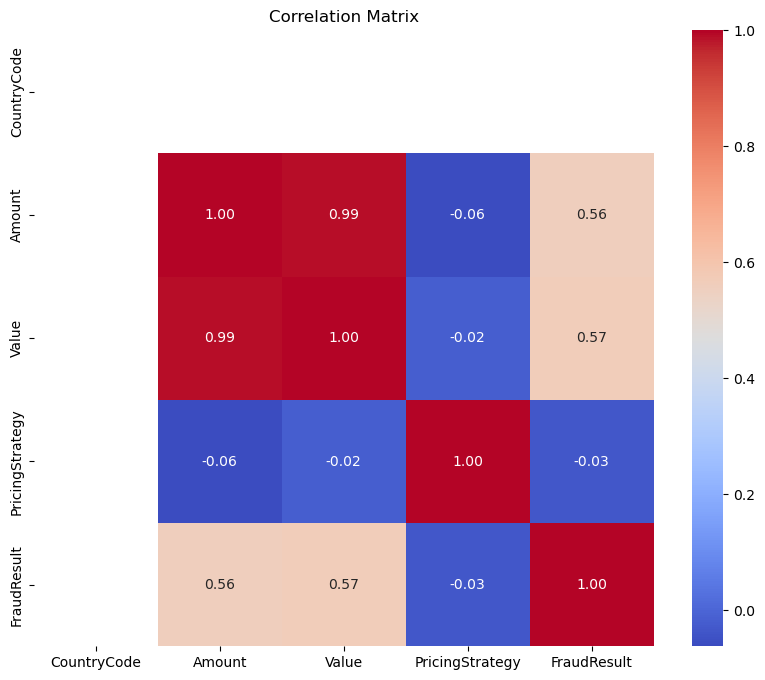

,CountryCode,Amount,Value,PricingStrategy,FraudResult
CountryCode,NaN,NaN,NaN,NaN,NaN
Amount,NaN,1.000000,0.989692,-0.061931,0.557370
Value,NaN,0.989692,1.000000,-0.017020,0.566739
PricingStrategy,NaN,-0.061931,-0.017020,1.000000,-0.033821
FraudResult,NaN,0.557370,0.566739,-0.033821,1.000000


In [35]:
# correlation analysis
cleaner.correlation_analysis()

In [36]:
# Identify missing value
cleaner.check_missing_values()

2025-01-24 20:44:55,475 - INFO - Checking for missing values in the DataFrame.
2025-01-24 20:44:55,562 - INFO - Missing values check completed.


,Column,Missing Values,Missing Percentage,Data Type
0,TransactionId,0,0.0,object
1,BatchId,0,0.0,object
2,AccountId,0,0.0,object
3,SubscriptionId,0,0.0,object
4,CustomerId,0,0.0,object
5,CurrencyCode,0,0.0,object
6,CountryCode,0,0.0,int64
7,ProviderId,0,0.0,object
8,ProductId,0,0.0,object
9,ProductCategory,0,0.0,object


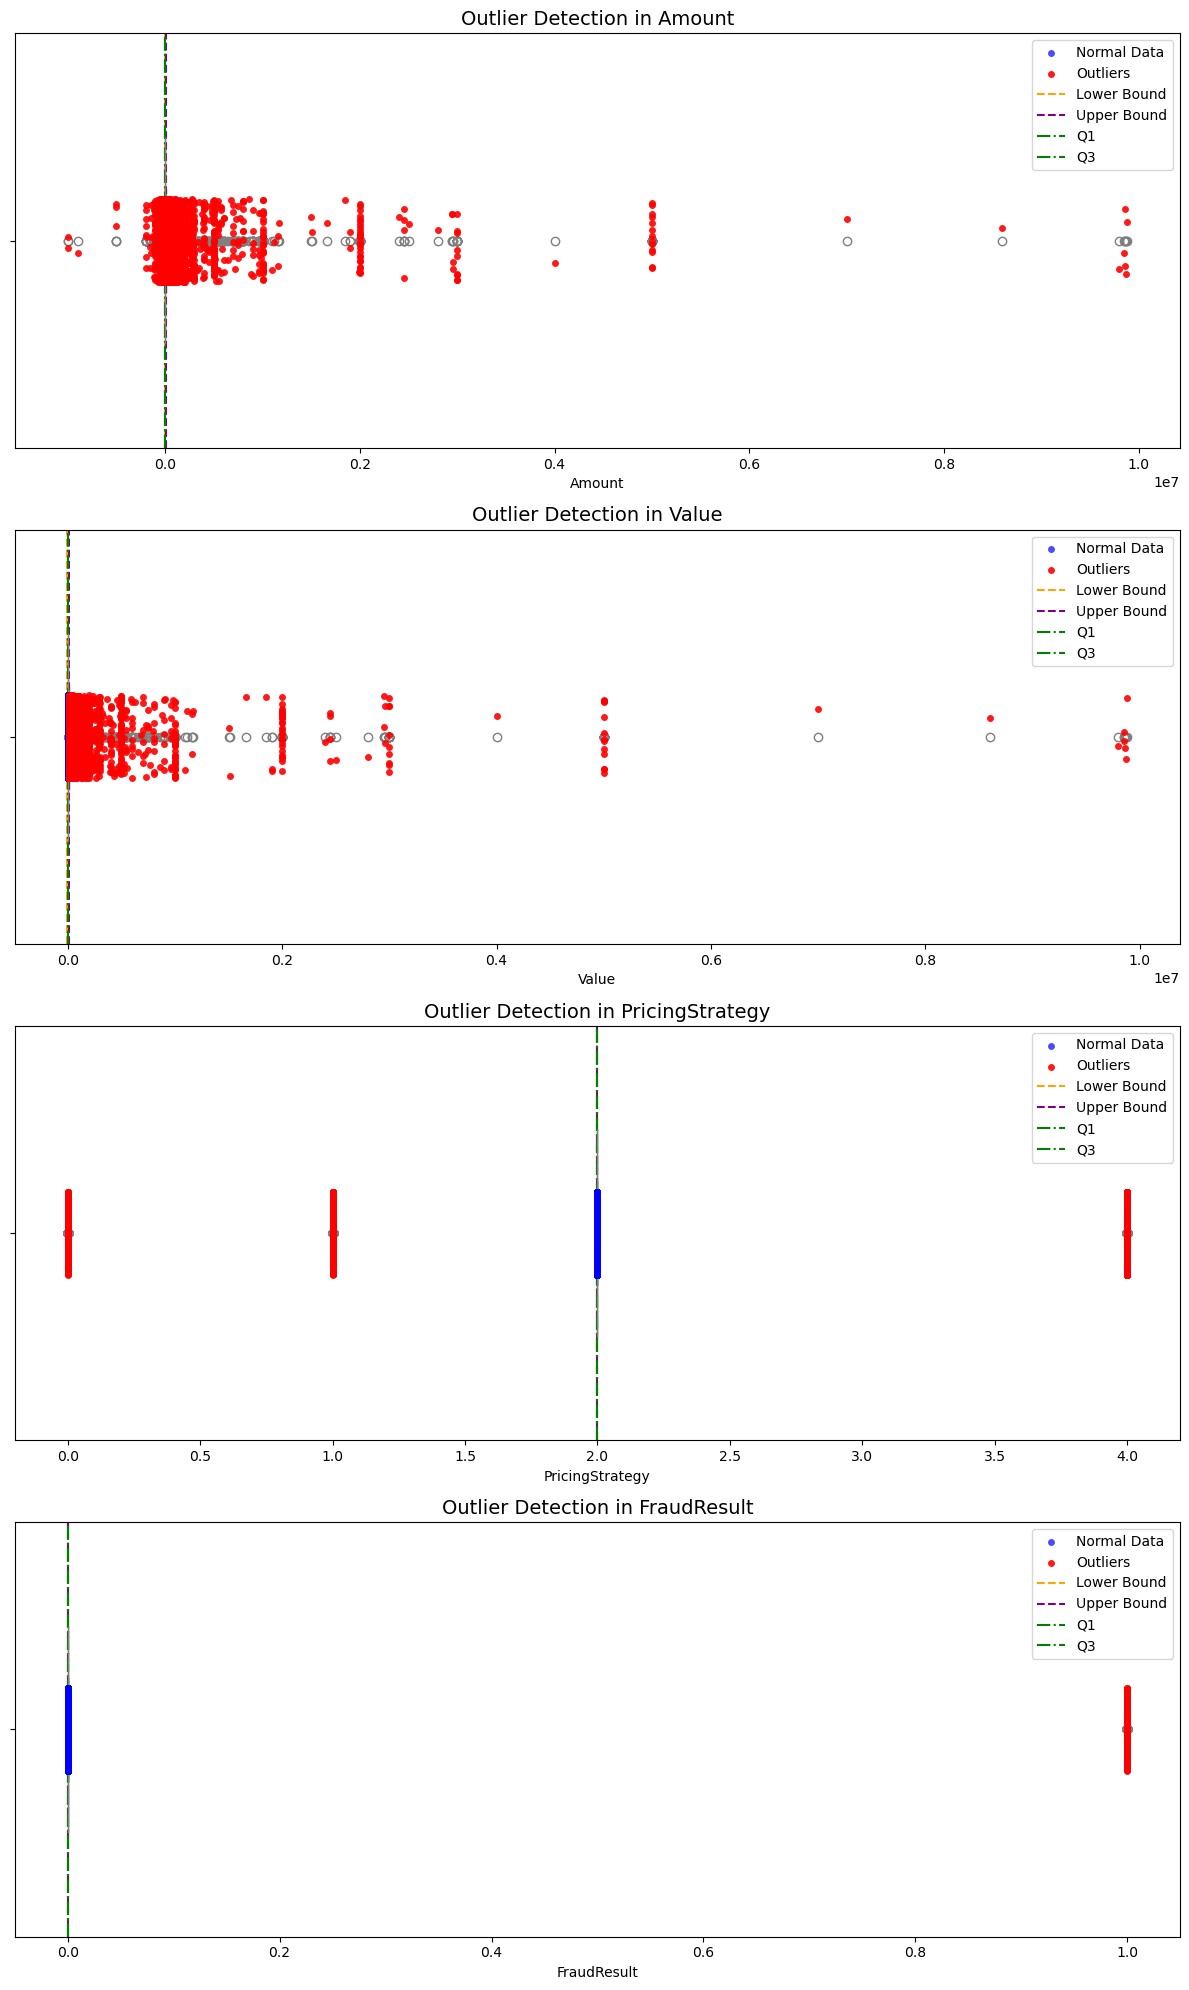

2025-01-24 20:45:05,830 - INFO - Outlier detection plots for columns Amount, Value, PricingStrategy, FraudResult generated successfully.


In [37]:
# Detect outliers
columns = ['Amount', 'Value', 'PricingStrategy', 'FraudResult']
cleaner.detect_outliers_plot(columns)